In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

This is the code for Figure in the methods section of main text. All datafiles are in a folder named "Data".

Datafiles details are below:

CFU Mapping - datafile with bacterial loads for the species MYb14 and the corresponding GFP reads in the experiment shown in Figure 3 in the main text.



In [10]:
#Load Data

CFUMap = pd.read_csv('../Data/CFU Mapping.csv')

#set condition list and color palette
conditions = ['CM25', 'CM100', 'CM250', 'CM500']
colors = { 'CM25': 'peru', 'CM100' : 'goldenrod', 'CM250' : 'palevioletred', 'CM500' : 'mediumslateblue'}

In [11]:
#filter for Time 72 since it was complete

T72CFUMapData = CFUMap[CFUMap["Time"] == "T72"]

[ 4.18797342 -0.41531343  4.70342558]
[4.00229686 0.88447249 3.06444603]


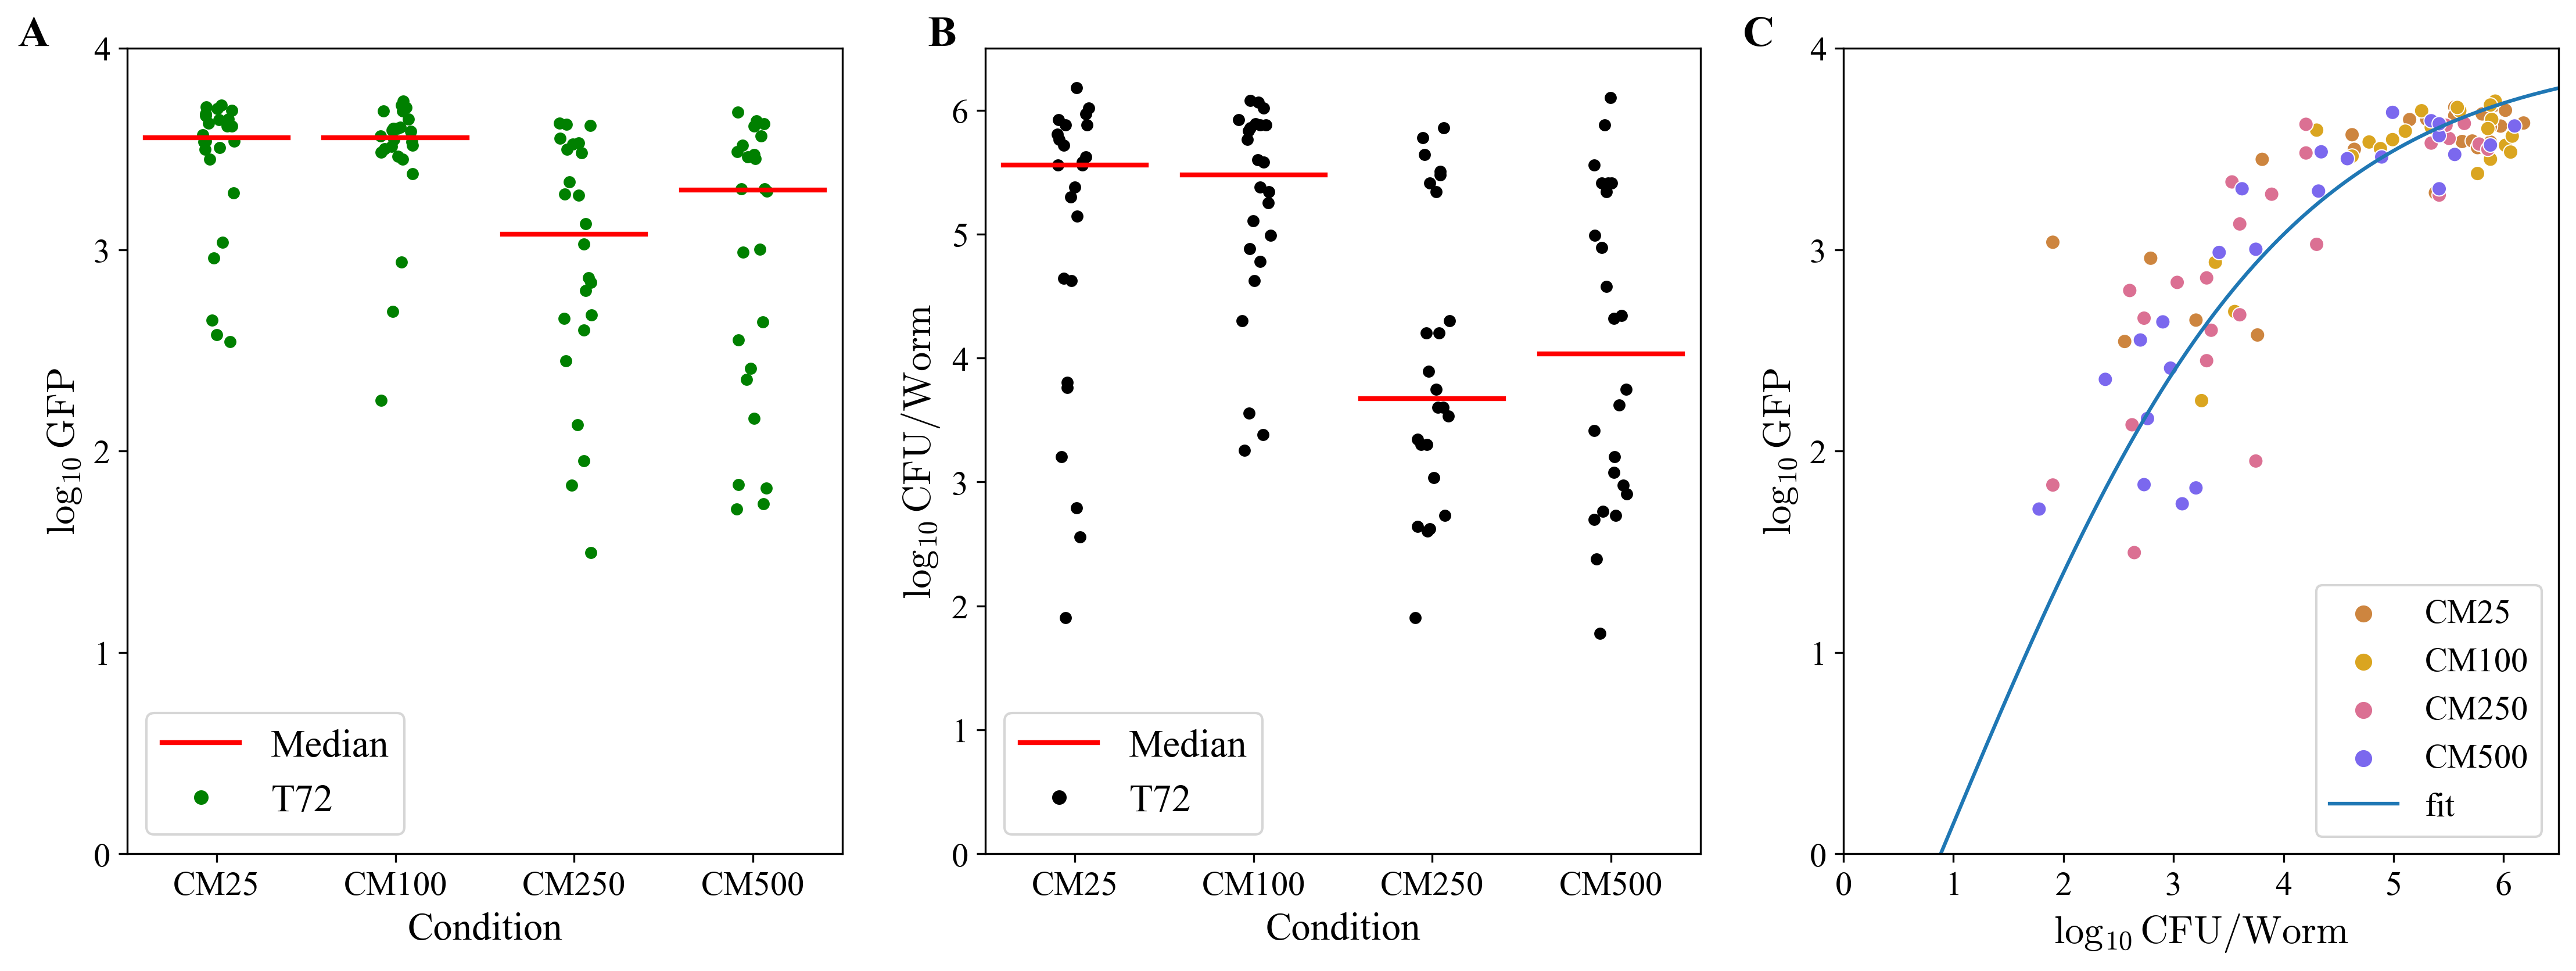

In [8]:
#GFP to CFU Mapping functions and parameters

gr=np.array(T72CFUMapData["Green"])
cfu=np.array(T72CFUMapData["CFU/worm"])
logGr=np.log10(gr)
logCFU=np.log10(cfu)

#log cfu to log gfp mapping
def lctolg(x,a,b,c):
    return a*np.tanh((x-b)/c)

#lof gfp to log cfu mapping
def lgtolc(x,a,b,c):
    return (c/2)*np.log((1+x/a)/(1-x/a))+b

param, paramcov = curve_fit(lctolg, logCFU, logGr, [3.6,.8,2.2])
parami, paramcovi = curve_fit(lgtolc, logGr, logCFU, param)
print(param)
print(parami)


x=np.arange(0,10,.01)




fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for condition in conditions:
    
    #Plot the Green data at different conditions and medians within condition
    sns.stripplot( x="Condition",y=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["Green"]),
                  data = T72CFUMapData[T72CFUMapData["Condition"] == condition],color = 'Green',ax = axes[0])
    
    sns.boxplot(showmeans=False,meanline=False, meanprops={'visible': False},
            medianprops={'color': 'r', 'ls': '-', 'lw': 2},whiskerprops={'visible': False},
            zorder=10,x=T72CFUMapData["Condition"],
            y=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["Green"]),
            data=T72CFUMapData[T72CFUMapData["Condition"] == condition],showfliers=False,showbox=False,
            showcaps=False,ax=axes[0])
    
     #Plot the CFU data at different conditions and medians within condition
    sns.stripplot( x="Condition",y=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["CFU/worm"]),
                  data = T72CFUMapData[T72CFUMapData["Condition"] == condition], color = 'Black',
                   ax = axes[1])
    sns.boxplot(showmeans=False,meanline=False, meanprops={'visible': False},
            medianprops={'color': 'r', 'ls': '-', 'lw': 2},whiskerprops={'visible': False},
            zorder=10,x=T72CFUMapData["Condition"],
            y=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["CFU/worm"]),
            data=T72CFUMapData[T72CFUMapData["Condition"] == condition],showfliers=False,showbox=False,
            showcaps=False,ax=axes[1])
    
    #Plot the GFP-CFU data across all conditions
    sns.scatterplot(x=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["CFU/worm"]),
                    y=np.log10(T72CFUMapData[T72CFUMapData["Condition"] == condition]["Green"]), hue="Condition",
                    data=T72CFUMapData[T72CFUMapData["Condition"] == condition], palette=colors, ax=axes[2])
    
from matplotlib.lines import Line2D
median_legend = Line2D([0], [0], color='r', ls='-', lw=2, label='Median')    
    
    
axes[0].set_ylabel(r'$\log_{10} \mathrm{GFP}$', fontsize = 16)
axes[0].set_ylim(0, 4)
axes[0].set_yticks(range(0, 5, 1))
axes[0].set_xlabel(r'Condition', fontsize = 16)
axes[0].tick_params(axis='both', which='major', labelsize=14)

axes[0].legend(handles=[median_legend, Line2D([0], [0], color='green', marker='.', linestyle='None', 
                                              markersize=10, label='T72')], loc='lower left', title='', 
               fontsize=16)

axes[1].set_ylabel(r'$\log_{10} \mathrm{CFU/Worm}$', fontsize = 16)
axes[1].set_ylim(0, 6.5)
axes[1].set_yticks(range(0, 7, 1))
axes[1].set_xlabel(r'Condition', fontsize = 16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].legend(['T72'], loc='lower left', title='', fontsize = 16)
axes[1].legend(handles=[median_legend, Line2D([0], [0], color='black', marker='.', linestyle='None', 
                                              markersize=10, label='T72')], loc='lower left', title='', 
               fontsize=16)

axes[2].set_ylabel(r'$\log_{10} \mathrm{GFP}$', fontsize = 16)
axes[2].set_ylim(0, 4)
axes[2].set_yticks(range(0, 5, 1))
axes[2].set_xlabel(r'$\log_{10} \mathrm{CFU/Worm}$', fontsize = 16)
axes[2].set_xlim(0, 6.5)
axes[2].set_xticks(range(0, 7, 1))
axes[2].tick_params(axis='both', which='major', labelsize=14)

#plot the mapping 

axes[2].plot(x,lctolg(x,*parami),label='fit')
axes[2].legend( loc='lower right', title='', fontsize = 14)

fig.text(0.09, 0.91, "A", fontsize=18, va='top', ha='left',weight='bold')
fig.text(0.38, 0.91, "B", fontsize=18, va='top', ha='left',weight='bold')
fig.text(0.64, 0.91, "C", fontsize=18, va='top', ha='left',weight='bold')

plt.savefig("../Figures/CFUMapping_DRexp3.pdf", dpi = 300, bbox_inches='tight')
plt.show()